In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import *
from sklearn.svm import SVC, NuSVC

In [85]:
df = pd.read_csv('Dataset.csv', names=['x', 'y', 'target'])
X, y = df[['x', 'y']], df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [104]:
df.head(10)

,x,y,target
0,6.11,9.40,0
1,3.80,4.40,0
2,4.94,8.02,0
3,3.95,5.62,0
4,5.11,8.74,0
5,3.38,5.53,0
6,4.08,6.47,0
7,3.58,4.59,0
8,4.78,6.77,0
9,4.11,4.75,0


In [86]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:07<00:00,  4.12it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.84               0.84     0.84      0.84   
SVC                                0.84               0.84     0.84      0.84   
LabelSpreading                     0.83               0.83     0.83      0.83   
NuSVC                              0.82               0.82     0.82      0.82   
SGDClassifier                      0.83               0.82     0.82      0.83   
LabelPropagation                   0.82               0.82     0.82      0.82   
RandomForestClassifier             0.80               0.80     0.80      0.80   
CalibratedClassifierCV             0.79               0.79     0.79      0.79   
LogisticRegression                 0.79               0.79     0.79      0.79   
RidgeClassifierCV                  0.79               0.79     0.79      0.79   
RidgeClassifier             

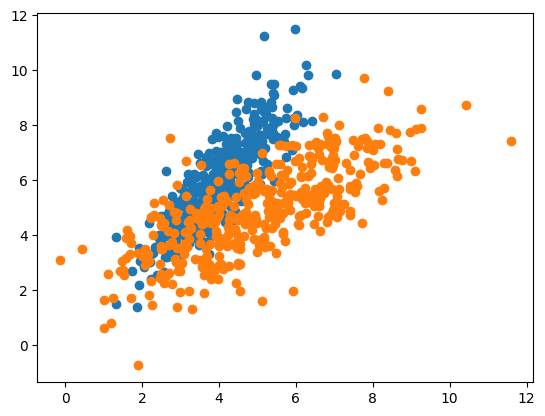

In [87]:
plt.scatter(df[df['target'] == 0]['x'],df[df['target'] == 0]['y'])
plt.scatter(df[df['target'] == 1]['x'],df[df['target'] == 1]['y'])
plt.show()

In [102]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, NuSVC
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

estimators = [('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()),
              ('SVC', SVC()),
              ('NuSVC', NuSVC()),
              ('LabelSpreading', LabelSpreading()),
              ('LabelPropagation', LabelPropagation())
              ]

eclf = VotingClassifier(estimators=estimators, voting='hard')

eclf.fit(X_train, y_train)
eclf.score(X_test, y_test)

0.85

In [105]:
from sklearn import *

In [117]:
clf = ensemble.AdaBoostClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7625